## Team 45: MoodLoop

### Team Members: Areeb Zahavi, Faris Majtaba Unal, Rishika Kokatam, Shaan Shailesh Patel

<span style="color:blue; font-size:2em;"> **SETUP** </span>

[You can remove this text from the final report. This is just to help you set up correctly.] 

Some tips for using jupyter notebook:
1. Check whether you are in code or markdown mode in each cell of the report. You can switch between them by clicking on the dropdown.
2. To plot figures, use plot_data() defined below. If you need to insert an image using markdown, you can use this code: `![title](image_folder/image_name.png)`
3. You should not have to edit the python files in the github repository for any of the tasks below. We have shared them just in case though.

In [3]:
# this function creates all in-line plots. DO NOT DELETE.
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt


def plot_data(data):
    # adjust rcParams as needed to make your graph readable
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.title('X,Y,Z Plot')
    plt.plot([row[0] for row in data],[row[1] for row in data], label="x")
    plt.plot([row[0] for row in data],[row[2] for row in data], label="y")
    plt.plot([row[0] for row in data],[row[3] for row in data], label="z")
    plt.legend(loc='upper right')
    plt.show()

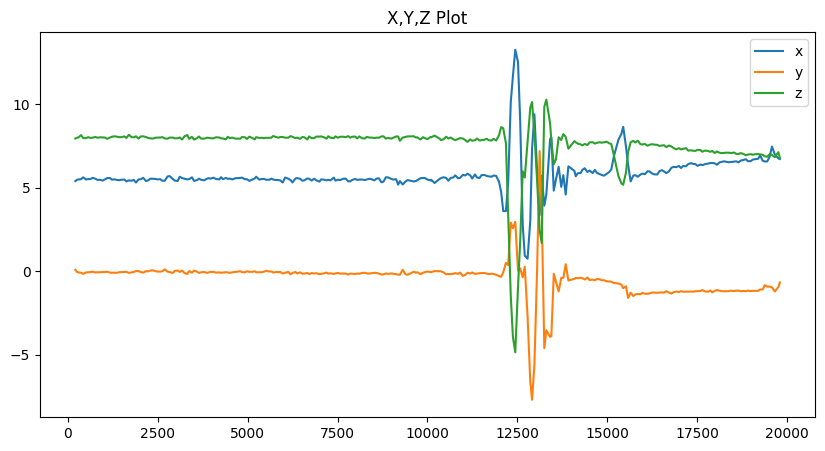

In [7]:
# this file is test.py
import parser_data
# numpy imported to check if the student has numpy
import numpy


data = parser_data.get_data("test.csv")
plot_data(data)

<span style="color:blue; font-size:2em;"> **TASK 1** </span>

### INSTRUCTIONS

**In your report** <br>

Calculate: <br> 
**a. [3 points]** Open walking_steps.csv collected and check relative_time column. What is the sampling rate for the accelerometer data? <br>
The sampling rate we found for walking_steps_1.csv was 99.432 samples per second. <br>

Reflect: <br>
**b. [3 points]** Is the sampling rate stable for the file walking_steps.csv? What is the variation? If it is not stable, explain what could be affecting the stability of the rate? (Hint: https://pure.au.dk/ws/files/93103132/sen099_stisenAT3.pdf, no need to thoroughly read the whole paper, this is just to lead you to think in the right direction. Looking at the first two pages should be sufficient) <br> 

The sampling rate is not stable for the data collected, but it is very small. We found the variation to be about 0.0000003395674709 seconds squared. We think that the sampling rate instability for walking_steps_1.csv is most likely due to the operating system's delay in attaching timestamps to sensor measurements and the device's I/O load.  Things like heavy multitasking can also affect the sampling rate stability by causing the OS to fail to attach accurate timestamp information as measurements are received.

**c. [3 points]** How does your understanding from part (a) affect your data processing pipeline? <br>

Given the potential instability in the sampling rate from sensor delays, it's important to implement preprocessing steps like interpolation or time alignment to standardize the sampling intervals before analysis. The presence of sensor biases also suggests the need for calibration techniques to ensure data consistency. Additionally, monitoring and mitigating the effects of high system load during data collection can help improve the reliability of the data processing pipeline.

**d. [3 points]** How can we make the data easier to work with (hint: [re-sampling the data](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html) )? Choose one method of your choice and briefly explain how the math works. <br> 

One effective method to make the data easier to work with is re-sampling the data to a uniform rate, which can smooth out inconsitency caused by varying sampling intervals. This can be done using interpolation, where the existing data points are adjusted to fit a desired sampling frequency. For instance, if I have data sampled at irregular intervals, I can use linear interpolation to estimate values at evenly spaced intervals, ensuring a consistent time grid. Mathematically, this involves using the formula:

y(t) = y_1 + [(t - t_1)/(t - t_2)](y_2 - y_1. Here, y(t) is the interpolated value at time t_1, and (t_1, y_1) and (t_2, y_2) are the closest known data points. 

This approach ensures that the time series data is consistent, making it easier to apply further analysis like Fourier transforms without the sampling rate instability.

**e. [3 points]** Do you think the current  sampling rate is a good basis for capturing human movements like walking?  Explain your reasons for or against your case.  <br> 

Based on the calculated sampling rate of around 99.432 Hz, this rate could be adequate for capturing human movements like walking, but it depends on the specifics of the movement you want to capture. Human walking at typical speeds generally involves periodic movements with frequencies that are well within range of our sampling rate. 

For instance, according to this paper: https://www.researchgate.net/figure/a-Probability-distribution-of-step-frequency-for-normal-walk-b-relationship-between_fig2_264890682

the average frequency of human steps is around 1.98 Hz, which is far lower than the sampling rate, meaning the sampling rate is more than enough to capture the dynamics of walking. However, if the movements involve very fast, subtle motions (such as quick arm gestures or running), a higher sampling rate might be necessary to capture these details. Overall, while the current rate is likely sufficient for standard walking, it may not be ideal for capturing more complex or rapid movements without loss of detail.

<span style="color:blue; font-size:2em;"> **TASK 2** </span>

### INSTRUCTIONS

**In your report** <br>
**a. [5 points]** Plot X, Y, Z  for walking_steps.csv and walking_steps_clean.csv <br>
**b. [5 points]** Plot X, Y, Z  for walking_steps2.csv and walking_steps_clean2.csv <br>
**c. [5 points]** Reflect on the movements in each axis, X, Y, Z of walking_steps_clean.csv. Give details as to how you collected the data and it resulted in movement in each axis.  <br>

**Code and Data files** <br>
In folder /data - Add walking_steps_clean.csv<br>
task2.py - Modify code clean_data below

**Note : Make sure you add/modify code below or your task 2 will not be graded.**  

In [ ]:
# this is task2.py
import parser_data


def clean_data(data, num=None):
    print ("Write code to remove garbage data")


    print ("Create new file without garbage data and save it in data folder")
    file_name_clean = "walking_steps_clean.csv"
    if num is not None:
        file_name_clean = f"data/walking_steps_{num}_clean.csv" 
        with open(file_name_clean, "w") as f:
            f.write("time,X,Y,Z\n")
            # write your cleaned data to the file



def main():
    # Get data
    for i in [1,2]:
        file_name = f"walking_steps_{i}.csv" # Change to your file name 
        data = parser_data.get_data(file_name) #data -- time,X,Y,Z 
        clean_data(data, i)
        newdata = parser_data.get_data(f"walking_steps_{i}_clean.csv")
        
        # Plot original and clean data


if __name__== "__main__":
    main()



<span style="color:blue; font-size:2em;"> **TASK 3** </span>

### INSTRUCTIONS

**In your report** <br>

**a. [6 points - 2 for each plot and 2 for reflection]**  <br>
Add the plot for magnitude for walking_steps_1_clean.csv and walking_steps_2_clean.csv.  <br>

1. Reflect how magnitude is different from X,Y,Z. 
2. How are the magnitudes different in the 2 files? (hint: orientation)<br>

**b. [6 points - 2 for each plot and 2 for reflection]**  <br>
Add the plot for moving average for for walking_steps_1_clean.csv and walking_steps_2_clean.csv using the method you implemented. 

1. How the moving average is different from magnitude.  <br>
2. On what factor(s) does moving average dependent? 

**c. [8 points]** Describe your step counting process.  <br>

**d. [10 points - 5 each]** Run walking_steps_clean.csv through your algorithm. How many steps did you count? Plot your raw data with steps labeled on it  <br>
1. walking_steps_1_clean.csv through your algorithm. 
2. walking_steps_2_clean.csv through your algorithm. 


**e. [10 points]** Reflect on how your calculations are different from ground truth data (100 steps).   <br>

**Code**  <br>
1. **util.py** - modify to implement functions vector_magnitude, moving_average below <br>
2. **task3.py**  - implement count_steps below <br>

**Note : Make sure you add/modify code below or your task 3 will not be graded.**  

In [ ]:
# this is util.py
from scipy.signal import butter, lfilter
import numpy


def vector_magnitude(data):
    """ function to calculate the magnitude of a vector

    Calculate the magnitude of the vector superposition of data (for
    example, acceleration) on x, y, and z axis

    Arguments:
        data: array of (x, y, z) tuples for a vector

    Returns:
        array of the magnitude of a vector

    """
    raise NotImplementedError


def moving_average(data, window_size):
    """ moving average filter

    Implement a simple moving average filter to use as a low pass
    filter

    Arguments:
        data: data be filtered
        window_size: window_size chosen for the data

    Returns:
        The filtered data.

    TODO:
        Finish this function. Think about how you want to handle
        the size difference between your input array and output array.
        You can write it yourself or consider using numpy.convole for
        it:
        https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

    """
    raise NotImplementedError

In [ ]:
# this is task3.py
import parser_data


def count_steps(data):
    print("Accelerometer data graph")
    plot_data(data)
    num_steps = 0
    '''
    ADD YOUR CODE HERE. This function counts the number of steps in data and returns the number of steps
    '''
    return num_steps


def main():
    # Get data
    for i in [1,2]:
        file_name = f"walking_steps_{i}_clean.csv" 
        data = parser_data.get_data(file_name)
        number_of_steps = count_steps(data, i)
        print("Number of steps counted are : {0:d}".format(number_of_steps))

if __name__== "__main__":
    main()



<span style="color:blue; font-size:2em;"> **TASK 4** </span>

### INSTRUCTIONS
**In your report** <br>
a. **[10 points]** Explain your algorithm for segmentation, with rationale.  <br>
b. **[5 points]** Plot of pre-segmented data.  Plot segmented data for climbing and walking. Make sure the way you plot (colors/ boxes/lines) easily differentiates the two. <br>
c. **[5 points]** What was the difference in the step counting method from task 3? <br>
d. **[5 points]** How many steps of stairs did you count? Plot labeled data for climbed steps. <br>
e. **[5 points]** Reflect on this exercise and compare it with what you learned in class. (hint: bulling’s activity recognition chain) <br>


**Code and Data files** <br>
In folder /data - Add climbing_steps.csv <br>
Task4.py - modify segment_climbing_walking, count_steps below <br>

**Note: Make sure you add/modify code below or your task 4 will not be graded.**

In [ ]:
# this is task4.py

import parser_data


def segment_climbing_walking(data):
    '''
    While collecting data on stairs there were times when you were also walking rather than climbing
    It is important to remove the parts from the data where you were walking in between the flight of stairs
    Write your own algorithm to find segments in data which corresponds to climbing only

    This functions returns
    List of tuples (x,y,z) which corresponds to climbing only.
    i.e. remove data points from the original data which corresponds to walking
    '''

    print ('segment_climbing_walking')
    plot_data(data)

    return data


def count_steps(data):
    print ('count_steps')
    num_steps = 0
    '''
    This function counts the number of steps in data and returns the number of steps
    '''
    return num_steps


def main():
    # Get data
    file_name = "test.csv"  # Change this to your data file name
    data = parser_data.get_data(file_name)
    
    segmented_data = segment_climbing_walking(data)
    number_of_steps = count_steps(segmented_data)
    print ("Number of steps counted are :{0:d}".format(number_of_steps))


if __name__== "__main__":
    main()
    

<span style="color:blue; font-size:2em;"> **BONUS: TASK 5** </span>

### INSTRUCTIONS
**In your report** <br>
**[5 points]** Match the dataset to the TA! Write the name of the dataset as provided to you next to the TA’s name. <br>

**[5 points]** Explain your process and methods - how did you go about solving this problem? ATTACH your source-code Python file (task5.py).


**Code and Data files** <br>
In folder /data - Download and unzip the data from Canvas <br>
Task5.py - Modify source-code task5.py below.

**Note: Make sure you add/modify code below or your task 5 will not be graded.**

In [ ]:
# this is task5.py
""" 
Task 5
Write the code for your task 5 in this file. You can use any method
you want. You can consider using the Bulling work flow. If you want,
you can use machine learning to solve the problem. Scikit learn is a
good python library for machine learning. You can also use the gui
interface of weka. If you do that, write your feature extraction
in this python file and describe how you used the weka gui to build the model.
"""
#your code here:
raise NotImplementedError